In [1]:
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv('./data/kaggle_tacademy/train.csv')
train

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,26044,57,Private,250201,11th,7,Married-civ-spouse,Other-service,Husband,White,Male,0,0,52,United-States,<=50K
26045,26045,23,Private,238092,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
26046,26046,78,?,165694,Masters,14,Widowed,?,Not-in-family,White,Female,0,0,15,United-States,<=50K
26047,26047,26,Self-emp-not-inc,151626,HS-grad,9,Never-married,Prof-specialty,Own-child,Black,Female,0,0,40,United-States,<=50K


# 1. Basic EDA

### Null?

<AxesSubplot:>

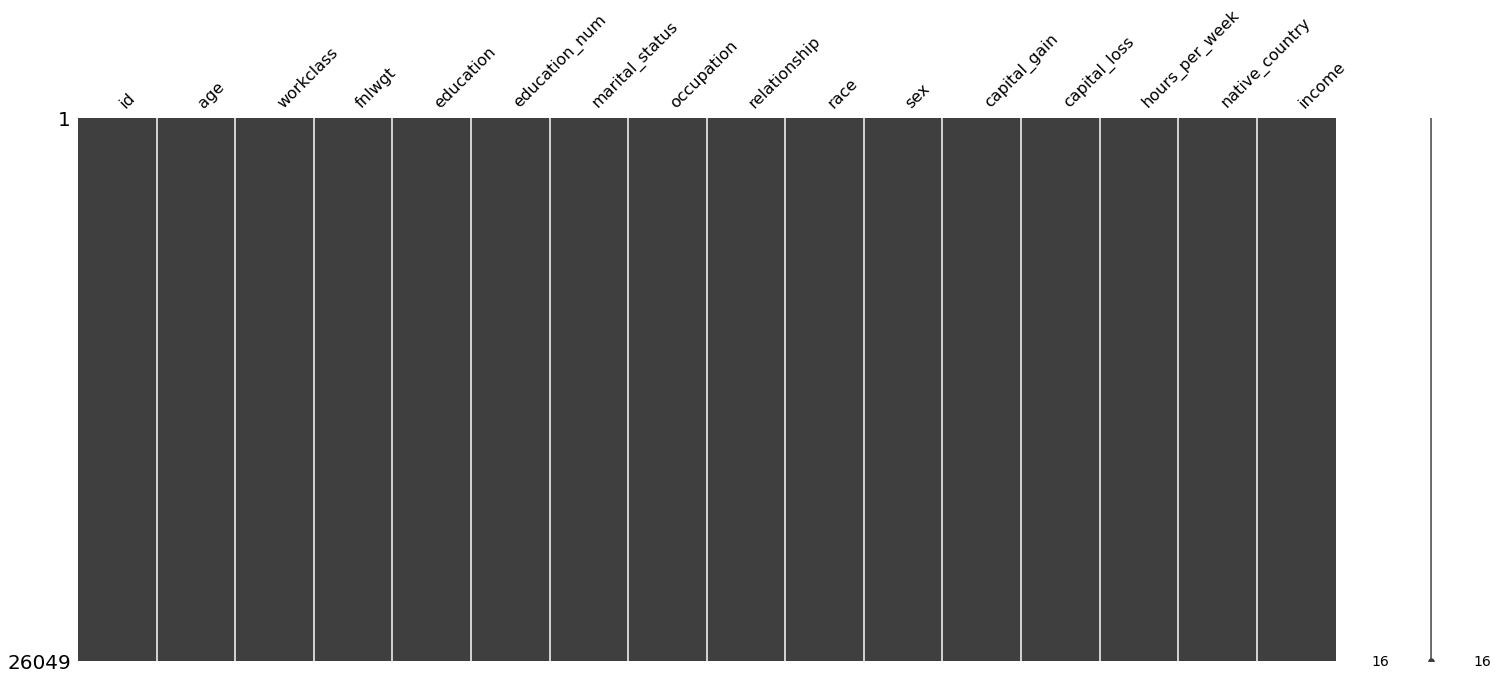

In [3]:
import missingno as msno

msno.matrix(train)

### id

In [4]:
len(set(train.id))

26049

### age

<AxesSubplot:>

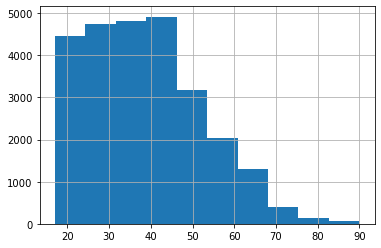

In [5]:
train.age.hist()

### workclass

In [6]:
len(train.workclass.unique())

9

In [7]:
train.workclass.unique()

array(['Private', 'State-gov', '?', 'Self-emp-not-inc', 'Local-gov',
       'Federal-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

아무래도 '?'는 nan인 것 같군요

In [8]:
import numpy as np
train = train.replace('?', np.nan)

In [9]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,NaN,<=50K


### fnlwgt
fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)

<AxesSubplot:>

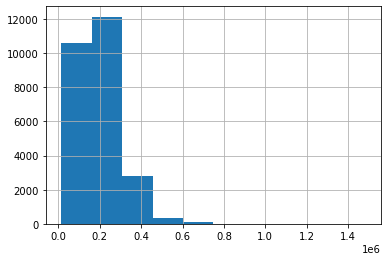

In [10]:
train.fnlwgt.hist()

### education

In [11]:
train.education.unique()

array(['HS-grad', '9th', 'Some-college', 'Bachelors', '11th', '1st-4th',
       '5th-6th', 'Assoc-acdm', '10th', 'Prof-school', '7th-8th',
       'Masters', 'Assoc-voc', 'Doctorate', '12th', 'Preschool'],
      dtype=object)

null값은 없는 것 같군요.

<AxesSubplot:>

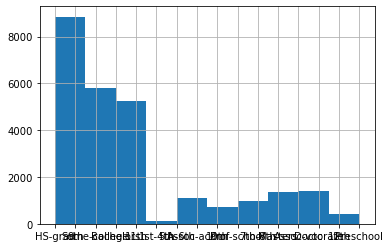

In [12]:
train.education.hist()

### education_num
education_num : 교육 수준 수치

<AxesSubplot:>

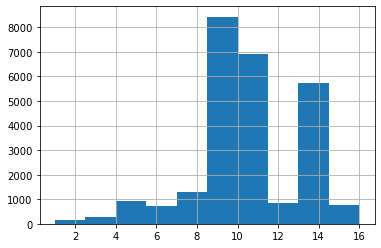

In [13]:
train.education_num.hist()

education과 education_num이 1:1 대응인지 확인해볼까요?

In [14]:
sorted({(e, n) for e, n in train[['education', 'education_num']].values}, key=(lambda x: x[0]))

[('10th', 6),
 ('11th', 7),
 ('12th', 8),
 ('1st-4th', 2),
 ('5th-6th', 3),
 ('7th-8th', 4),
 ('9th', 5),
 ('Assoc-acdm', 12),
 ('Assoc-voc', 11),
 ('Bachelors', 13),
 ('Doctorate', 16),
 ('HS-grad', 9),
 ('Masters', 14),
 ('Preschool', 1),
 ('Prof-school', 15),
 ('Some-college', 10)]

In [15]:
sorted({(e, n) for e, n in train[['education', 'education_num']].values}, key=(lambda x: x[1]))

[('Preschool', 1),
 ('1st-4th', 2),
 ('5th-6th', 3),
 ('7th-8th', 4),
 ('9th', 5),
 ('10th', 6),
 ('11th', 7),
 ('12th', 8),
 ('HS-grad', 9),
 ('Some-college', 10),
 ('Assoc-voc', 11),
 ('Assoc-acdm', 12),
 ('Bachelors', 13),
 ('Masters', 14),
 ('Prof-school', 15),
 ('Doctorate', 16)]

다행히 1:1 대응인 것 같군요?

### matrial_status

In [16]:
train.marital_status.unique()

array(['Married-civ-spouse', 'Never-married', 'Separated',
       'Married-spouse-absent', 'Divorced', 'Widowed',
       'Married-AF-spouse'], dtype=object)

### occupation

In [17]:
train.occupation.unique()

array(['Sales', 'Machine-op-inspct', 'Other-service', 'Prof-specialty',
       'Adm-clerical', 'Craft-repair', nan, 'Handlers-cleaners',
       'Farming-fishing', 'Exec-managerial', 'Transport-moving',
       'Protective-serv', 'Tech-support', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

In [18]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

### relationship

In [19]:
train.relationship.unique()

array(['Husband', 'Own-child', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

### race

In [20]:
train.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

### sex

In [21]:
train.sex.unique()

array(['Male', 'Female'], dtype=object)

### capital_gain
양도 소득

<AxesSubplot:>

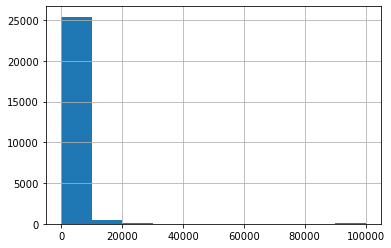

In [22]:
train.capital_gain.hist(bins=10)

전체 데이터가 26000개 가량인데 25000개가 첫 번째 bin에 몰려있네요? 음 더 자세히 살펴봐야겠는데요?

<AxesSubplot:>

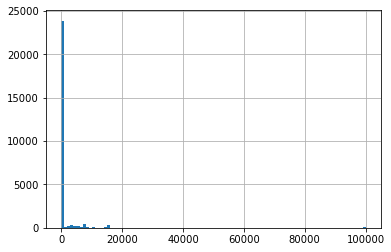

In [23]:
train.capital_gain.hist(bins=100)

In [24]:
train.capital_gain.unique()

array([    0,  7298,  3103,  2176,  2885,  2174,  3273,  4064,  2414,
        7688, 15024,  2829,  3411, 99999,  1173,  1797,  4650,  4101,
        4386,  3325,  7896,  2580,  2202,  5178,  3781,  6849,  8614,
        3464,  6767,  5013, 20051,  1055,  2050,  2964, 10520,  3908,
        2463,  3942,  4787,   991,   914,  2407,  4934,  3818,  3418,
        2346,  1639, 14344,  1848, 25124,  2228,  1086, 14084, 13550,
       25236,  2538,  6360,  5455, 34095,  3432,  2329,  9386,  6514,
        6723,   114,  2062, 10566,  1151,  6497,  2907,  7443,  4416,
        3137,  9562, 10605,  1506,  6097,  2354, 22040,  2290, 27828,
        3887,   594,  2977,  5721, 15831,  4865,  1111,  2597,  3471,
        3674,  4931,  2993,  7430,  4508,  1471,  1424,  7978,  4687,
       15020,  5556,  3456,  2036,  1409,  2653,  6418, 11678,  2635,
         401, 41310,  2009,  2105,  2387, 18481,  1831,  2936,  2961,
        5060,  1455], dtype=int64)

In [25]:
from collections import Counter
gain_count = dict(Counter(train.capital_gain.values))
gain_count = sorted(gain_count.items(), key=(lambda x: x[1]), reverse=True)
gain_count

[(0, 23856),
 (15024, 283),
 (7688, 229),
 (7298, 205),
 (99999, 127),
 (3103, 85),
 (5178, 80),
 (4386, 57),
 (5013, 52),
 (8614, 46),
 (2174, 39),
 (3325, 39),
 (4064, 32),
 (4650, 32),
 (10520, 32),
 (14084, 30),
 (3137, 30),
 (27828, 30),
 (20051, 29),
 (2829, 28),
 (3908, 28),
 (14344, 23),
 (6849, 22),
 (9386, 22),
 (594, 22),
 (13550, 21),
 (1055, 20),
 (2885, 19),
 (3464, 19),
 (4787, 19),
 (2407, 18),
 (2597, 18),
 (2176, 17),
 (3411, 17),
 (4101, 17),
 (4865, 15),
 (1506, 12),
 (2202, 11),
 (3942, 11),
 (3674, 11),
 (25236, 10),
 (6497, 10),
 (2964, 9),
 (2463, 9),
 (5455, 9),
 (10605, 9),
 (2354, 9),
 (4508, 9),
 (2414, 8),
 (2580, 8),
 (3781, 8),
 (2907, 8),
 (6418, 8),
 (3818, 7),
 (1151, 7),
 (4416, 7),
 (2977, 7),
 (3471, 7),
 (7430, 7),
 (2635, 7),
 (2105, 7),
 (1471, 6),
 (1409, 6),
 (3273, 5),
 (1797, 5),
 (914, 5),
 (4934, 5),
 (2346, 5),
 (2329, 5),
 (6514, 5),
 (10566, 5),
 (3887, 5),
 (15831, 5),
 (5556, 5),
 (2653, 5),
 (1831, 5),
 (6767, 4),
 (991, 4),
 (1848, 4

### capital_loss
양도 손실

<AxesSubplot:>

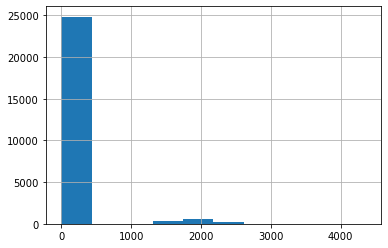

In [26]:
train.capital_loss.hist()

In [27]:
from collections import Counter
loss_count = dict(Counter(train.capital_loss.values))
loss_count = sorted(loss_count.items(), key=(lambda x: x[1]), reverse=True)
loss_count

[(0, 24823),
 (1902, 168),
 (1977, 136),
 (1887, 129),
 (1602, 41),
 (2415, 41),
 (1485, 41),
 (1848, 37),
 (1740, 35),
 (1876, 34),
 (1590, 30),
 (1672, 26),
 (1564, 24),
 (1669, 23),
 (1741, 20),
 (2258, 20),
 (1408, 18),
 (2001, 18),
 (2051, 17),
 (1579, 17),
 (1980, 16),
 (1719, 16),
 (2002, 15),
 (1721, 15),
 (2377, 15),
 (1628, 13),
 (1504, 13),
 (1974, 12),
 (1762, 11),
 (625, 10),
 (2179, 10),
 (2339, 10),
 (2444, 9),
 (2824, 8),
 (2559, 8),
 (1651, 8),
 (2042, 8),
 (2205, 8),
 (2392, 7),
 (1594, 7),
 (2174, 6),
 (1092, 6),
 (1340, 6),
 (2206, 5),
 (880, 5),
 (1380, 5),
 (2246, 5),
 (1573, 5),
 (1617, 4),
 (2547, 4),
 (2057, 4),
 (1726, 4),
 (1258, 4),
 (213, 4),
 (2129, 3),
 (2457, 3),
 (2603, 3),
 (1668, 3),
 (1825, 3),
 (419, 3),
 (653, 3),
 (3683, 2),
 (1138, 2),
 (974, 2),
 (1648, 2),
 (3770, 2),
 (2231, 2),
 (3900, 2),
 (4356, 2),
 (810, 2),
 (2352, 2),
 (2149, 2),
 (2754, 2),
 (2238, 2),
 (1755, 2),
 (2267, 2),
 (2201, 1),
 (2489, 1),
 (1816, 1),
 (2163, 1),
 (323, 1),
 

### hours_per_week

<AxesSubplot:>

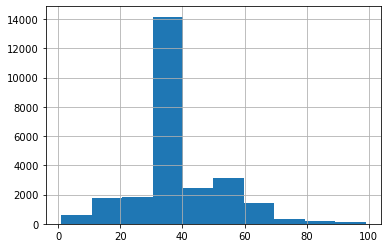

In [28]:
train.hours_per_week.hist()

<AxesSubplot:>

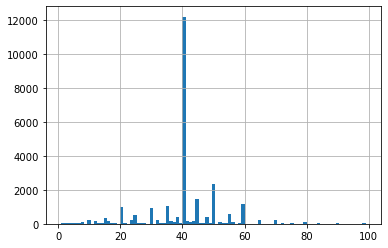

In [29]:
train.hours_per_week.hist(bins=len(train.hours_per_week.unique()))

흠, 그래프가 되게 기분 나쁘게 생겼네요... 뭐 어찌됐든...

In [30]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

### native_country

In [31]:
train.native_country.unique()

array(['United-States', nan, 'Mexico', 'Poland', 'Philippines',
       'Puerto-Rico', 'Vietnam', 'Germany', 'Cuba', 'France', 'Ireland',
       'El-Salvador', 'Guatemala', 'Haiti', 'Trinadad&Tobago', 'Jamaica',
       'Canada', 'Taiwan', 'South', 'Columbia', 'Peru', 'Japan',
       'Dominican-Republic', 'China', 'England', 'Iran', 'India',
       'Nicaragua', 'Italy', 'Honduras', 'Thailand', 'Ecuador',
       'Portugal', 'Hungary', 'Greece', 'Hong',
       'Outlying-US(Guam-USVI-etc)', 'Cambodia', 'Scotland', 'Yugoslavia',
       'Laos'], dtype=object)

### income

In [32]:
train.income.unique()

array(['>50K', '<=50K'], dtype=object)

In [33]:
target_name = train.income.unique().tolist()

In [34]:
train.income = train.income.replace(target_name[1], 0)
train.income = train.income.replace(target_name[0], 1)

<AxesSubplot:>

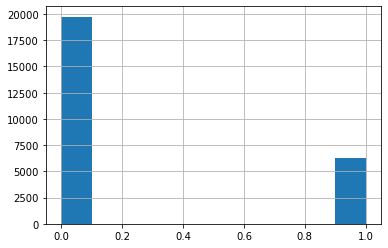

In [35]:
train.income.hist()

상당히 imbalance 되어 있구만요

<AxesSubplot:>

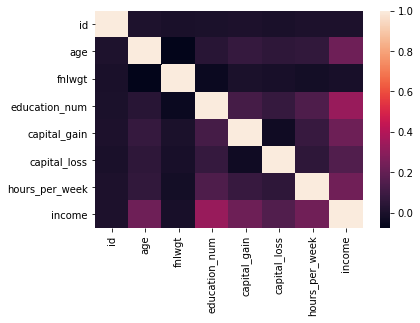

In [36]:
sns.heatmap(train.corr())

## 2. Deeper EDA - Target층 간의 차이

<AxesSubplot:xlabel='age', ylabel='fnlwgt'>

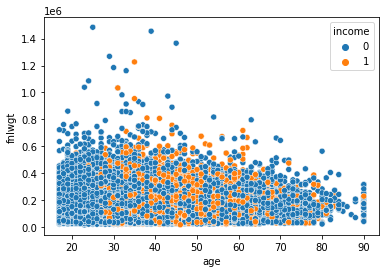

In [37]:
sns.scatterplot(data=train, x='age', y='fnlwgt', hue='income')

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       24547 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      24541 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  25593 non-null  object
 15  income          26049 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.2+ MB


<AxesSubplot:xlabel='hours_per_week', ylabel='age'>

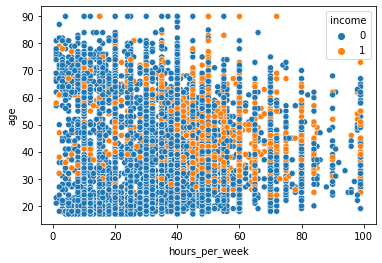

In [39]:
sns.scatterplot(data=train, x='hours_per_week', y='age', hue='income')

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       24547 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      24541 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  25593 non-null  object
 15  income          26049 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.2+ MB


## 3. Preprocessing
+ nan은 버립시다(과감히)
+ string으로 되어 있는 데이터는 LabelEncoder
+ 숫자로 되어있는 건
    + id는 날려버리고
    + age의 경우는 왼쪽으로 조금 치우쳐져있으니, 로그를 씌워볼까요?
    + fnlwgt도 왼쪽으로 치우쳐져있고 값도 크니까 로그를 씌워버립시다.
    + education, education_num은 같은 거니까 이미 LabelEncoding된 education_num만 씁시다.
    + capital_gain, capital_loss는 일부 사람들이 가지고 있는 값이니까... 파생변수로 capital_gain이 있다와 없다, capital_loss가 있다와 없다로 나눠볼까요?

In [41]:
preprocessed = train.copy()
preprocessed.shape

(26049, 16)

### LabelEncoder

In [42]:
preprocessed.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [43]:
to_encode = ['workclass', 'education', 'marital_status',
             'occupation', 'relationship', 'race', 'sex', 'native_country']

encoded = pd.get_dummies(preprocessed[to_encode])
preprocessed.drop(columns=to_encode+['id', 'education_num'], axis=1, inplace=True)

In [44]:
preprocessed = pd.concat([preprocessed, encoded], axis=1)
preprocessed

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,40,168538,0,0,60,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,17,101626,0,0,20,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,18,353358,0,0,16,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,21,151158,0,0,25,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,24,122234,0,0,20,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,57,250201,0,0,52,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
26045,23,238092,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
26046,78,165694,0,0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26047,26,151626,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Numerics

#### age

In [45]:
import numpy as np

<AxesSubplot:>

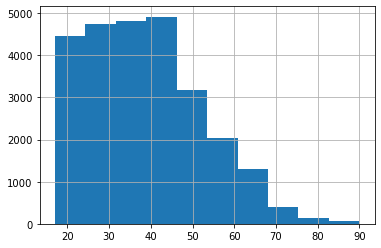

In [46]:
train.age.hist()

<AxesSubplot:>

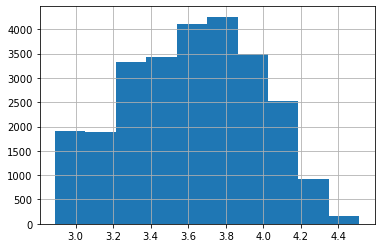

In [47]:
np.log1p(preprocessed.age).hist()

In [48]:
preprocessed.age = preprocessed.age.map(lambda x: np.log1p(x))
preprocessed

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,3.713572,168538,0,0,60,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,2.890372,101626,0,0,20,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2.944439,353358,0,0,16,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,3.091042,151158,0,0,25,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,3.218876,122234,0,0,20,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,4.060443,250201,0,0,52,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
26045,3.178054,238092,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
26046,4.369448,165694,0,0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26047,3.295837,151626,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
from sklearn.preprocessing import StandardScaler

age_scaler = StandardScaler()
preprocessed.age = age_scaler.fit_transform(preprocessed.age.values.reshape(-1, 1))

#### fnlwgt

<AxesSubplot:>

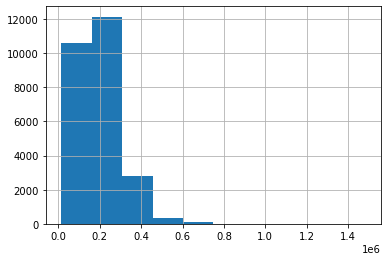

In [50]:
train.fnlwgt.hist()

<AxesSubplot:>

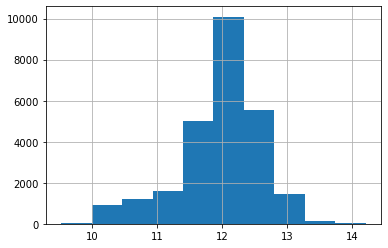

In [51]:
np.log1p(train.fnlwgt).hist()

In [52]:
preprocessed.fnlwgt = preprocessed.fnlwgt.map(lambda x: np.log1p(x))
preprocessed

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.273149,12.034922,0,0,60,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-2.076200,11.529065,0,0,20,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,-1.921896,12.775240,0,0,16,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,-1.503502,11.926088,0,0,25,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-1.138675,11.713701,0,0,20,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,1.263091,12.430024,0,0,52,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
26045,-1.255178,12.380417,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
26046,2.144966,12.017904,0,0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26047,-0.919035,11.929179,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
fnlwgt_scaler = StandardScaler()
preprocessed.fnlwgt = fnlwgt_scaler.fit_transform(preprocessed.fnlwgt.values.reshape(-1, 1))

#### hours_per_week

<AxesSubplot:>

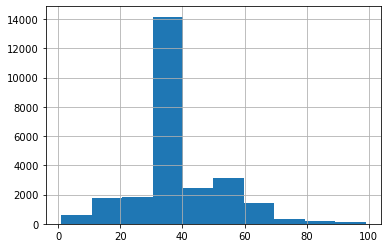

In [54]:
train.hours_per_week.hist()

In [55]:
hours_per_week_scaler = StandardScaler()
preprocessed.hours_per_week = hours_per_week_scaler.fit_transform(preprocessed.hours_per_week.values.reshape(-1, 1))

### Capitals gain/loss

In [56]:
preprocessed['gain_bool'] = preprocessed.capital_gain.map(lambda x: not(x == 0))
preprocessed['loss_bool'] = preprocessed.capital_loss.map(lambda x: not(x == 0))

#### Gain

In [57]:
preprocessed[preprocessed.gain_bool]

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,gain_bool,loss_bool
16,-0.346336,0.307866,7298,0,0.368631,1,0,0,0,1,...,0,0,0,0,0,1,0,0,True,False
21,0.202678,0.884768,3103,0,0.773109,1,0,0,0,1,...,0,0,0,0,0,1,0,0,True,False
27,-1.503502,0.447980,2176,0,-0.035847,0,0,0,0,1,...,0,0,0,0,0,1,0,0,True,False
31,-0.919035,1.214419,2885,0,-0.035847,0,0,0,0,1,...,0,0,0,0,0,1,0,0,True,False
42,-1.026743,-0.228784,2174,0,-0.035847,0,0,0,0,1,...,0,0,0,0,0,0,1,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26002,0.723009,-1.112323,27828,0,0.773109,1,0,0,0,0,...,0,0,0,0,0,1,0,0,True,False
26027,1.162943,0.554776,7298,0,1.582065,1,0,0,0,1,...,0,0,0,0,0,1,0,0,True,False
26033,0.202678,0.531467,7298,0,-0.035847,1,0,0,0,1,...,0,0,0,0,0,1,0,0,True,False
26036,-0.178410,-0.048192,4064,0,0.773109,0,0,1,0,0,...,0,0,0,0,0,1,0,0,True,False


<AxesSubplot:>

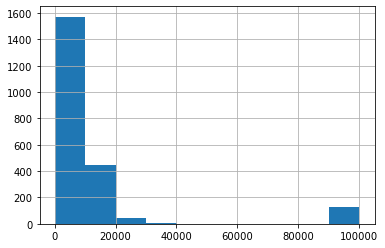

In [58]:
preprocessed[preprocessed.gain_bool].capital_gain.hist()

In [59]:
preprocessed[preprocessed.gain_bool]['capital_gain']

16        7298
21        3103
27        2176
31        2885
42        2174
         ...  
26002    27828
26027     7298
26033     7298
26036     4064
26037     2829
Name: capital_gain, Length: 2193, dtype: int64

In [60]:
preprocessed.loc[preprocessed.gain_bool, 'capital_gain'] = preprocessed.loc[preprocessed.gain_bool, 'capital_gain'].map(lambda x: np.log1p(x))

<AxesSubplot:>

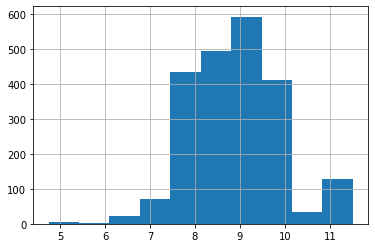

In [61]:
preprocessed[preprocessed.gain_bool].capital_gain.hist()

#### Loss

<AxesSubplot:>

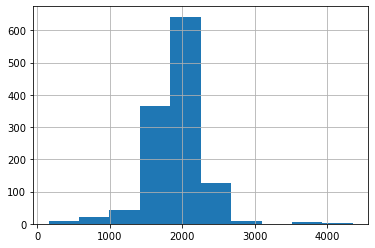

In [62]:
preprocessed[preprocessed.loss_bool].capital_loss.hist()

In [63]:
capital_loss_scaler = StandardScaler()
preprocessed.loc[preprocessed.loss_bool, 'capital_loss'] = capital_loss_scaler.fit_transform(preprocessed.loc[preprocessed.loss_bool, 'capital_loss'].values.reshape(-1, 1))

In [64]:
train_preprocessed = preprocessed.copy()
train_preprocessed

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,gain_bool,loss_bool
0,0.273149,0.076616,0.0,0.0,1.582065,1,0,0,0,1,...,0,0,0,0,0,1,0,0,False,False
1,-2.076200,-0.725509,0.0,0.0,-1.653759,0,0,0,0,1,...,0,0,0,0,0,1,0,0,False,False
2,-1.921896,1.250515,0.0,0.0,-1.977341,0,0,0,0,1,...,0,0,0,0,0,1,0,0,False,False
3,-1.503502,-0.095961,0.0,0.0,-1.249281,0,0,0,0,1,...,0,0,0,0,0,1,0,0,False,False
4,-1.138675,-0.432736,0.0,0.0,-1.653759,0,0,0,0,1,...,0,0,0,0,0,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,1.263091,0.703116,0.0,0.0,0.934900,0,0,0,0,1,...,0,0,0,0,0,1,0,0,False,False
26045,-1.255178,0.624456,0.0,0.0,-0.035847,0,0,0,0,1,...,0,0,0,0,0,1,0,0,False,False
26046,2.144966,0.049630,0.0,0.0,-2.058237,0,0,0,0,0,...,0,0,0,0,0,1,0,0,False,False
26047,-0.919035,-0.091059,0.0,0.0,-0.035847,0,0,0,0,0,...,0,0,0,0,0,1,0,0,False,False


### Nan

In [65]:
preprocessed.dropna(axis=0, inplace=True)

### Run!

In [81]:
y = preprocessed.income

In [82]:
X = preprocessed.drop(columns=['income'])

In [72]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine, load_breast_cancer, load_digits
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


class AutoML:

    
    def __init__(self, X, y, test_size=0.2, split=False):

        self.models = {
            'DecisionTreeClassifier': DecisionTreeClassifier,
            'RandomForestClassifier': RandomForestClassifier,
            'SVC': SVC,
            'SGDClassifier': SGDClassifier,
            'LogisticRegression': LogisticRegression
            }
    
        self.split = split
        if split:
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
        else:
            self.X, self.y = X, y
        
        self.results = dict()
        
        
    def fit(self):
        
        for name, model in self.models.items():
    
            classifier = model()
            if self.split:
                classifier.fit(self.X_train, self.y_train)
            else:
                classifier.fit(self.X, self.y)
                
            self.models[name] = classifier
            
            
    def predict(self, X_test=None, y_test=None):
        
        for name, model in self.models.items():
            
            if X_test: pass
            else: X_test = self.X_test
                
            if y_test: pass
            else: y_test = self.y_test
            
            y_pred = model.predict(X_test)
            self.results[name] = {
                'accuracy_score': accuracy_score(y_test, y_pred),
                'classification_report': classification_report(y_test, y_pred),
                'confusion_matrix': confusion_matrix(y_test, y_pred)
            }
            
    def show(self, insight='classification_report'):

        for name, result in self.results.items():

            print(name)
            if insight == 'confusion_matrix':
                sns.heatmap(result[insight], annot=True)
                plt.show()

            else:
                print(result[insight])

In [ ]:
automl = AutoML(X, y)

automl.fit()
automl.predict()
automl.show('confusion_matrix')
automl.show()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [85]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
print(classification_report(y_test, lgbm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      3990
           1       0.76      0.64      0.69      1220

    accuracy                           0.87      5210
   macro avg       0.83      0.79      0.80      5210
weighted avg       0.86      0.87      0.86      5210



<AxesSubplot:>

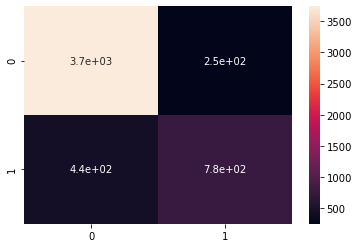

In [91]:
sns.heatmap(confusion_matrix(y_test, lgbm.predict(X_test)), annot=True)

In [86]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3990
           1       0.77      0.65      0.70      1220

    accuracy                           0.87      5210
   macro avg       0.83      0.80      0.81      5210
weighted avg       0.87      0.87      0.87      5210



<AxesSubplot:>

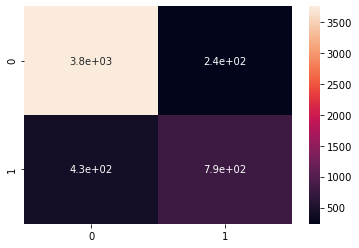

In [92]:
sns.heatmap(confusion_matrix(y_test, xgb.predict(X_test)), annot=True)

In [76]:
test = pd.read_csv('./data/kaggle_tacademy/test.csv')
test_preprocessed = test.copy()
test_preprocessed = test_preprocessed.replace('?', np.nan)

to_encode = ['workclass', 'education', 'marital_status',
             'occupation', 'relationship', 'race', 'sex', 'native_country']

encoded = pd.get_dummies(test_preprocessed[to_encode])
test_preprocessed.drop(columns=to_encode+['id', 'education_num'], axis=1, inplace=True)

test_preprocessed = pd.concat([test_preprocessed, encoded], axis=1)

test_preprocessed.age = test_preprocessed.age.map(lambda x: np.log1p(x))
test_preprocessed.age = age_scaler.fit_transform(test_preprocessed.age.values.reshape(-1, 1))

test_preprocessed.fnlwgt = test_preprocessed.fnlwgt.map(lambda x: np.log1p(x))
test_preprocessed.fnlwgt = fnlwgt_scaler.fit_transform(test_preprocessed.fnlwgt.values.reshape(-1, 1))

test_preprocessed.hours_per_week = hours_per_week_scaler.fit_transform(test_preprocessed.hours_per_week.values.reshape(-1, 1))

test_preprocessed['gain_bool'] = test_preprocessed.capital_gain.map(lambda x: not(x == 0))
test_preprocessed['loss_bool'] = test_preprocessed.capital_loss.map(lambda x: not(x == 0))

test_preprocessed.loc[test_preprocessed.gain_bool, 'capital_gain'] = test_preprocessed.loc[test_preprocessed.gain_bool, 'capital_gain'].map(lambda x: np.log1p(x))
test_preprocessed.loc[test_preprocessed.loss_bool, 'capital_loss'] = capital_loss_scaler.fit_transform(test_preprocessed.loc[test_preprocessed.loss_bool, 'capital_loss'].values.reshape(-1, 1))

In [77]:
test_preprocessed

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,gain_bool,loss_bool
0,-0.726049,-1.347532,0.0,0.0,-0.033750,0,0,0,1,0,...,0,0,0,0,0,1,0,0,False,False
1,0.267463,-2.267399,0.0,0.0,0.779950,0,0,0,0,1,...,0,0,0,0,0,1,0,0,False,False
2,-1.652129,-0.577981,0.0,0.0,-1.254299,0,0,0,1,0,...,0,0,0,0,0,1,0,0,False,False
3,0.267463,-0.513228,0.0,0.0,0.779950,0,0,0,1,0,...,0,0,0,0,0,1,0,0,False,False
4,0.049449,-1.787390,0.0,0.0,4.767078,0,0,0,1,0,...,0,0,0,0,0,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,-0.105677,-1.502904,0.0,0.0,-0.033750,0,0,0,1,0,...,0,0,0,0,0,1,0,0,False,False
6508,0.336602,-2.525160,0.0,0.0,-0.033750,0,0,0,0,1,...,0,0,0,0,0,1,0,0,False,False
6509,0.196617,1.504881,0.0,0.0,-0.033750,0,0,0,1,0,...,0,0,0,0,0,0,0,0,False,False
6510,-0.105677,0.206279,0.0,0.0,-0.033750,0,0,0,1,0,...,0,0,0,0,0,1,0,0,False,False


In [80]:
sample_submission = pd.read_csv('./data/kaggle_tacademy/sample_submission.csv')
sample_submission['prediction'] = lgbm.predict(test_preprocessed.drop(columns=['native_country_Holand-Netherlands']))
sample_submission.to_csv('submission.csv', index=False)

In [93]:
sample_submission = pd.read_csv('./data/kaggle_tacademy/sample_submission.csv')
sample_submission['prediction'] = xgb.predict(test_preprocessed.drop(columns=['native_country_Holand-Netherlands']))
sample_submission.to_csv('submission.csv', index=False)